# EXPLORATION 1: 가위, 바위, 보 인식

### 라이브러리 import 및 변수 선언

In [56]:
# -----------------------------------
# Rock Scissor Paper game
#
# 시작: 2022.01.04
# 업데이트: 2022.01.10 (Version 0.1)
# 신동욱 (AIFFEL/강남3기/9회차)
# -----------------------------------

import tensorflow as tf
from tensorflow import keras
import numpy as np

import matplotlib.pyplot as plt
import os

from PIL import Image
import glob

# -----------------------------------
# 변수 선언
# -----------------------------------
path = []
path = ['rock', 'scissor', 'paper'] # 가위 바위 보 폴더 딕셔너리로 저장, 동일한 명령을 반복하지 않고 for 문으로 간략화 하기 위한 꼼수

### 데이터 전처리 함수 정의

In [57]:
# 이미지 리사이즈 함수 (28x28)
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    target_size=(28,28)
  
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        #new_img2=new_img.transpose(Image.FLIP_LEFT_RIGHT)  # 이미지 반전을 테스트 하기 위해서 추가한 코드
        new_img.save(img, "JPEG")
      
    print(len(images), " images resized.")

In [58]:
# 훈련 데이터 불러 오기 함수 (# 가위 : 0, 바위 : 1, 보 : 2)
def load_traning_data(img_path, number_of_data=300):  # 총합 주의 특히 data1의 경우 3000개
    
    img_size=28
    color=3
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0          # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1          # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2          # 보 : 2
        idx=idx+1
    
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


# 테스트 데이터 불러 오기 함수
def load_test_data(img_path, number_of_data=300): # 총합 주의 특히 data1의 경우 3000개

    img_size=28
    color=3

    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0          # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1          # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2          # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

### 이미지 리사이즈

In [86]:
# scissor, rock, paper 각 폴더 이지미 28x28로 리사이즈
for pathTmp in path:
    image_dir_path = os.getenv("HOME") + '/aiffel/workplace/E01_rock_scissor_paper/data2/' + pathTmp
    resize_images(image_dir_path)
    
print("모든 이미지 resize 완료!")

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
모든 이미지 resize 완료!


### 데이터 로딩 (훈련용, 테스트용)

In [60]:
# scissor, rock, paper 각 폴더 훈련용 이미지 데이터 로딩
image_dir_path2 = os.getenv("HOME") + '/aiffel/workplace/E01_rock_scissor_paper/data5'
(x_train, y_train)=load_traning_data(image_dir_path2)

# scissor, rock, paper 각 폴더 테스트 이미지 데이터 로딩
image_dir_path3 = os.getenv("HOME") + '/aiffel/workplace/E01_rock_scissor_paper/data2'
(x_test, y_test)=load_test_data(image_dir_path3)

# 정규화 값 확인
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))
print("x_train_norm shape: {}".format(x_train_norm.shape))
print("x_test_norm shape: {}".format(x_test_norm.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
테스트데이터(x_test)의 이미지 개수는 300 입니다.
최소값: 0.0  최대값: 1.0
x_train_norm shape: (300, 28, 28, 3)
x_test_norm shape: (300, 28, 28, 3)


### 딥러닝 네트워크 설계 및 모델 훈련

In [61]:
n_channel_1=64
n_channel_2=128
n_dense=128
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
print("x_train_norm shape: {}".format(x_train_norm.shape))
print("y_train_norm shape: {}".format(y_train.shape))
print("x_test_norm shape: {}".format(x_test_norm.shape))
print("x_test_norm shape: {}".format(y_test.shape))


model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# model training
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# evaluation
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model에 추가된 Layer 개수:  7
x_train_norm shape: (300, 28, 28, 3)
y_train_norm shape: (300,)
x_test_norm shape: (300, 28, 28, 3)
x_test_norm shape: (300,)
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_33 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_66 (Dense)             (None,

# 데이터 분석 및 회고

### 1. 들어가며

인공지능 수업을 시작하고 거의 일주일만에 처음으로 하게 된 익스플로러1의 프로젝트 '가위, 바위, 보 게임' 일단 구현해서 제대로 돌아 가는 것이 목표였고 그 다음은 여러종류의 데이터들을 사용해서 대체 어떻게 적용되고 있는지 파악하는 것이 목표였다.

하여 일단 성공적으로 코드가 돌아 간다고 판단한 이후에 나는 네개의 데이터 세트를 만들었다. 네개의 데이터 세트는 각각 총 300개의 사진으로 구성되었으며 가위, 바위, 보 각각 100개씩으로 구성되었다. 이후 데이터의 수를 늘려서 정확도를 올릴 목적으로 총 3천개의 사진으로 구성된 데이터세트 하나를 추가 하여 구성하였다. 총 5개의 데이터 셋을 사용하여 본 실험을 진행하였다. 

### 2. 데이터 세트의 구성
데이터 세트는 다음과 같이 구성하였다. 

data1: 단일색 배경, 여러가지 자세, 크기별 촬영. 총 3천장의 이미지 (각 1,000장)  
data2: 단일색 배경, 손바닥면 기준으로 각도만 조금씩 변경하여 촬영. 총 300장의 이미지 (각 100장)  
data3: LMS에서 제공된 데이터. 총 300장의 이미지 (각 100장), 흰색 천장을 배경으로 촬영, 손의 각도가 매우 다양함, 심지어 손 뒷면도 나옴  
data4: 강남캠 1조 오지훈님의 데이터 총 300장의 이미지 (각 100장), 얼굴과 주변 환경이 모두 사진에 포함됨  
data5: 단일색 배경, 기준없이 마구 움직이며 촬영. 총 300장의 이미지 (각 100장)



### 3. 가설 및 실험 방법


#### (1) 가설
(1) 동일한 데이터셋을 훈련과 테스트에서 사용하면 거의 1에 가까운 accuracy를 얻을 수 있을것이다.  
(2) 비슷한 환경(배경 및 사진에서 손이외의 다른 사물의 촬영여부, 손의 포즈의 유사함)으로 촬영된 데이터 셋을 훈련과 테스트에 사용하면 높음 accuracy를 얻을 수 있을 것이다.  
(3) 다른 환경에서 촬영된 데이터셋을 훈련과 테스트에 사용하면 낮은 accuracy를 얻을 것이다.


#### (2) 실험방법

[표 1] 의 방법으로 실험을 진행하였다. 

(1) 하나의 훈련 데이터세트로 훈련시켜 모델을 만들고 만들어진 모델에 5개의 테스트 데이터세트를 사용하여 accuracy를 evaluate 하였다.  
(2) 각 데이터셋 당 4번의 evaluation을 진행하고 평균을 구하여 사용하였다.  
(3) 하이퍼파라메터 조절에 대한 효과를 확인하기 위해서 Type1, Type2 두개의 하이퍼파라메터를 사용하였다.

    Type1의 하이퍼파라메터 구성  
    - 1st Conv2D = 16  
    - 2nd Conv2D = 32  
    - Dense = 64  
    - train epoch = 15    
    
    Type2의 하이퍼파라메터 구성
    - 1st Conv2D = 64  
    - 2nd Conv2D = 128  
    - Dense = 128  
    - train epoch = 15 
    
    

### 4. 실험 결과 

실험 결과 [표1]과 같은 결과를 볼 수 있었다.

(1) 동일한 데이터 세트로 훈련과 테스트를 한 경우(노란색) 1이거나 거의 1에 가까운 accuracy 결과를 보였다.  
(2) 동일하지는 않지만 비슷한 환경(배경 및 사진에서 손이외의 다른 사물의 촬영여부, 손의 포즈의 유사함)의 데이터셋을 훈련과 테스트에 사용한 경우 (파란색) 0.85 ~ 1의 accuracy 결과를 보였다.  
(3) 하지만 동일한 데이터를 사용하여 훈련과 테스트를 진행했음에도 불구하고 date3-data3의 accuracy결과는 매우 낮은 accuracy 결과를 보였다.  
(4) 나머지 경우의 데이터셋을 사용한 테스트에서는 95%이상의 accuracy 0.5 이하의 저조한 결과를 보였다.  
(5) 또한 파라메터 변경으로 인한 accuracy는 약간의 개선은 있었지만 매우 미미한 것으로 확인되었다. 심지어 어떤 것은 더 낮아지는 결과를 보이기도 한다.



### 5. 고찰

충분한 연구를 위해서는 좀 더 많은 시간이 필요하지만 제출 기한을 코앞에 앞둔터라 나머지 실험과 개선시도는 과제제출 이후에 지속적으로 진행할 예정이다.

아래 결과를 가지고 여러가지로 고민하고 테스트 하던중에 손의 각도와 자세의 변화로 인한 것이 낮은 인식률의 원인중 하나가 아닐까 생각하여 다음과 같은 실험을 진행해 보았다. 

추가실험: data2의 데이터셋으로 훈련하고 data2의 사진들을 좌우반전 시켜 테스트에 사용하였다. 좌우반전 전 후의 accuracy를 측정해 보았고 결과는 다음과 같았다.  

원본 vs 원본: 0.97  
원본 vs 좌우반전: 0.73

결과와 같이 좌우반전을 시킨경우에 accuracy가 낮아 지는 것을 확인 할 수 있다. 반전된 사진들 중에서 다른 것으로 인식한 것들이 있었다고 볼 수 있다. 
따라서 손의 각도나 자세들이 accuracy에 영향을 미쳤을 가능성이 매우 높게 판단된다. 

향후 성능을 개선하기 위해서는 다음과 같은 사항들을 고려해서 모델을 만들고 테스트 해야 한다고 생각한다. 

(1) 손의 각도별사진을 촬영하여 학습시킨다.  
(2) 손의 자세별 사진을 촬영하여 학습시킨다.  
(3) 손만 나온 깨끗한 이미지를 사용하여 학습 시킨다.

이후에 어느정도의 성능이 나와 준다면 그때 추가적인 성능 개선을 위해서 파라메터나 모델을 수정하는 방법을 사용해야 할 것으로 생각된다.    


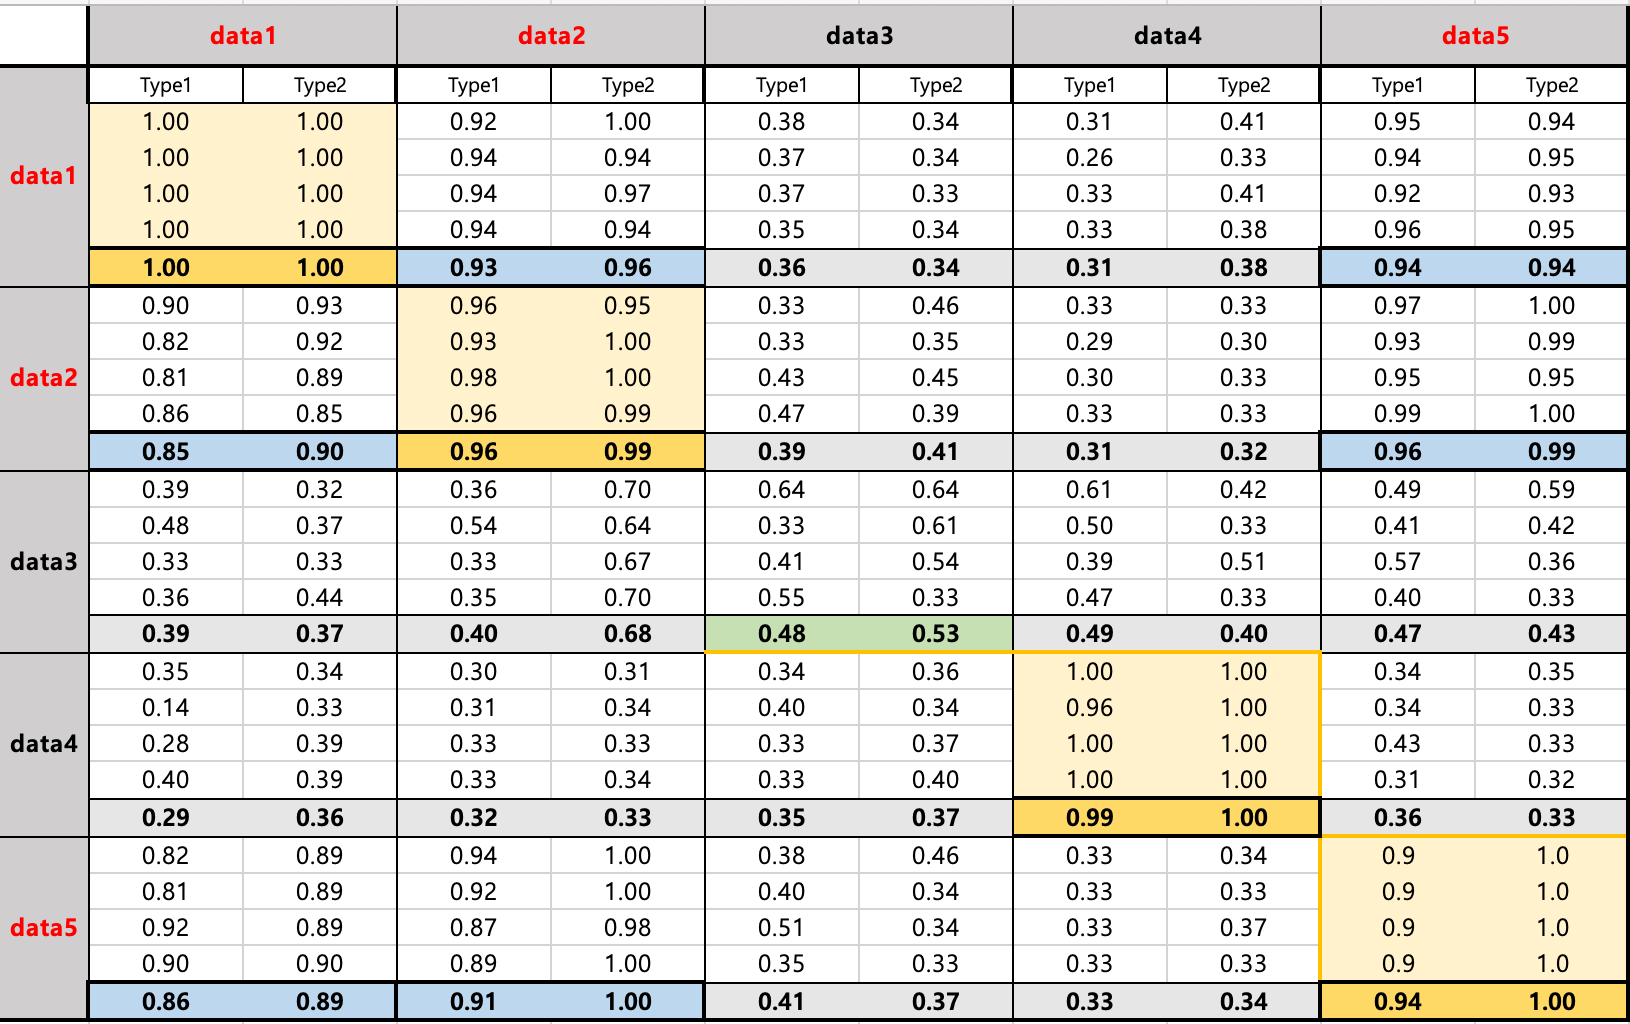

<center><b> [표 1]. 각 데이터 세트별 Test Accuracy </b> </center>